# importing library

In [2]:
from sklearn.metrics import r2_score
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
df = pd.read_csv("Data/Data3Y.csv")

# take a look at the dataset
df.head(11)
#df.describe()

,date,tmin,tmax,prcp,snow,snwd,awnd
0,2017-01-01,41,50,0.54,0.0,0.0,6.49
1,2017-01-02,47,51,1.08,0.0,0.0,5.59
2,2017-01-03,47,56,0.31,0.0,0.0,5.37
3,2017-01-04,41,64,0.00,0.0,0.0,5.82
4,2017-01-05,29,44,0.00,0.0,0.0,2.01
5,2017-01-06,32,43,0.25,0.0,0.0,6.04
6,2017-01-07,20,32,0.60,0.5,0.0,9.62
7,2017-01-08,15,27,0.00,0.0,1.2,4.92
8,2017-01-09,9,31,0.00,0.0,1.2,2.46
9,2017-01-10,24,48,0.00,0.0,1.2,5.14


### Data Exploration

Let's first have a descriptive exploration on our data.


In [1]:
df.describe()

NameError: name 'df' is not defined

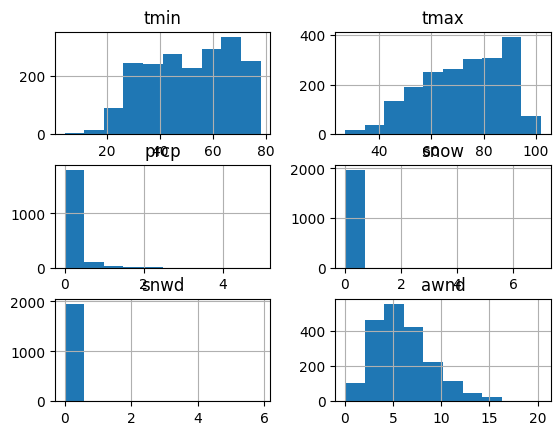

In [5]:
viz = df
viz.hist()
plt.show()

# Tmin && Tmax selected

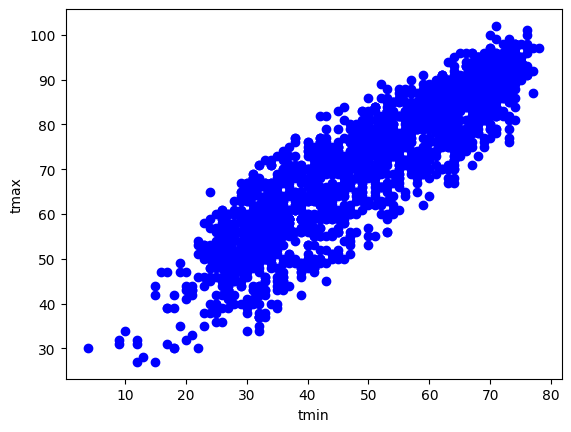

In [8]:
plt.scatter(df.tmin, df.tmax,  color='blue')
plt.xlabel("tmin")
plt.ylabel("tmax")
plt.show()

# separate train and test Data

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

#### Train data distribution


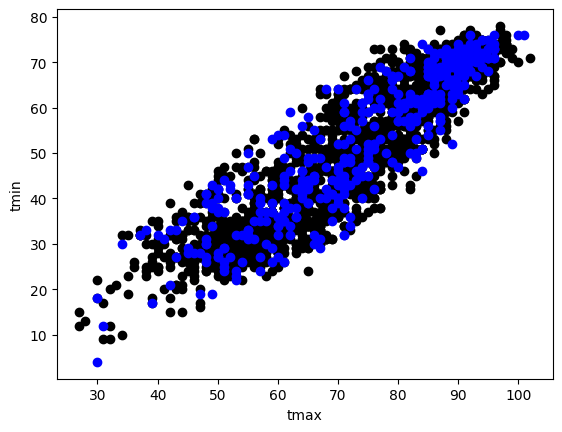

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.tmax, train.tmin,  color='black')
ax1.scatter(test.tmax, test.tmin,  color='blue')
plt.xlabel("tmax")
plt.ylabel("tmin")
plt.show()

In [12]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['tmax']])
train_y = np.asanyarray(train[['tmin']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print ("score   : %.3f" % regr.score(train_x, train_y))

Coefficients:  [[0.90782324]]
Intercept:  [-14.64892758]
score   : 0.812


Text(0, 0.5, 'FUELCONSUMPTION_COMB_MPG')

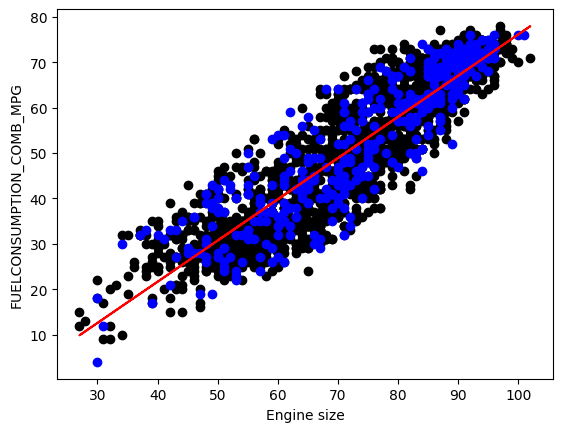

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train.tmax, train.tmin,  color='black')
ax1.scatter(test.tmax, test.tmin,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("FUELCONSUMPTION_COMB_MPG")